In [79]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from plot_confusion_matrix import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from math import pi
import re

In [80]:
df=pd.read_csv(r"datasets/08_SyntaxParseTreeComplexity_df.csv", sep="|", lineterminator='\n')
display(df.head(1400))

df = df[df["newLevel"] != "L"]
df = df[df["Type"] == "Writing"]
level = df.groupby('newLevel')
df = level.apply(lambda x: x.sample(level.size().min()).reset_index(drop=True))

print(len(df[df["newLevel"]=="A"]))

,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
0,A1,Meine Familie,Zu meiner Familie gehören vier Personen. Die M...,https://german.net/reading/familie/,Reading,A,Zu meiner Familie gehören vier Personen. Die M...,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.042017
1,A1,Maria und ihre Familie,Mein Name ist Maria. Ich bin 30 Jahre alt. Zu ...,https://german.net/reading/marias-familie/,Reading,A,Mein Name ist Maria. Ich bin 30 Jahre alt. Zu ...,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.105263,0.083333,0.000000,0.000000,0,0.075581
2,A1,Ich bin Tom,Hallo! Ich bin Tom Maier. Ich bin 13 Jahre alt...,https://german.net/reading/tom/,Reading,A,Hallo! Ich bin Tom Maier. Ich bin 13 Jahre alt...,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.093023
3,A1,Freundinnen,Ricarda ist 21 Jahre alt und wohnt in Lübeck. ...,https://german.net/reading/freundinnen/,Reading,A,Ricarda ist 21 Jahre alt und wohnt in Lübeck. ...,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.034783
4,A1,Einkaufen im Supermarkt,Frau Meier geht heute in den Supermarkt. Ihr M...,https://german.net/reading/einkaufen/,Reading,A,Frau Meier geht heute in den Supermarkt. Ihr M...,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.044444,0.052632,0.000000,0.000000,0,0.030928
5,A1,Frühstück,Es ist 7 Uhr am Morgen. Familie Müller sitzt a...,https://german.net/reading/fruehstueck/,Reading,A,Es ist 7 Uhr am Morgen. Familie Müller sitzt a...,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.031250
6,A1,Susanne schreibt einen Brief,Lieber Thomas! Jetzt bist du weit weg! Ich bin...,https://german.net/reading/brief/,Reading,A,Lieber Thomas! Jetzt bist du weit weg! Ich bin...,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.055556,0.058824,0.058824,0.055556,0,0.109091
7,A1,Der Skiurlaub,Hartmut hat im Februar eine Reise gemacht: Er ...,https://german.net/reading/skiurlaub/,Reading,A,Hartmut hat im Februar eine Reise gemacht: Er ...,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.113475
8,A1,Struppi,Jan hat einen kleinen Hund. Er heißt Struppi u...,https://german.net/reading/struppi/,Reading,A,Jan hat einen kleinen Hund. Er heißt Struppi u...,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.045113
9,A1,In der Schule,Heute ist der erste Schultag. Lena steht mit i...,https://german.net/reading/schule/,Reading,A,Heute ist der erste Schultag. Lena steht mit i...,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.045455,0.041667,0.000000,0.000000,0,0.021164


549


In [81]:
df = df.drop(errors="ignore", columns=["LD-yule_s_k", "LD-hdd", "SC-av_non_terminals_per_word", "SC-av_clause_length"])

for columnName in df._get_numeric_data().columns:
    print(columnName)
    display(df[df[columnName].isnull()].head())

SE_ratioRealSpellingErrors


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SE_ratioSpellingErrors


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SE_ratioSpellingErrorsWithCorrection


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SE_ratioSpellingErrorsWithoutCorrection


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SE_ratioUmlautSpellingErrors


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SE_ratioCapitalisationErrors


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


BF-average_sentence_length


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


BF-average_syllable_word


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


BF-Flesch_Reading_Ease_Score


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


BF-Flesch_Kincaid_readability


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


BF-percentag_hard_words


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


BF-fog


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


BF-polysyllable_count


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


BF-smog


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


BF-average_character_per_word


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


BF-text_length


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LD-ttr


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LD-root_ttr


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LD-corrected_ttr


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LD-log_ttr


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LD-uber_index


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LD-mtld


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LV-lexical_density


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LV-lexical_word_variation


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LV-noun_variation


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LV-adj_variation


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LV-adv_variation


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LV-modifier_variation


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LV-verb_variation1


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LV-verb_variation2


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LV-squared_verb_variation


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LV-corrected_verb_variation


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LV-verb_token_ratio


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LV-noun_token_ratio


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


LV-verb_noun_token_ratio


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-meanFreq


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-medianFreq


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-bin0


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-bin1


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-bin2


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-bin3


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-bin4


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-bin5


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-bin6


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-bin7


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-bin8


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-bin9


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-bin10


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-bin11


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-bin12


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-bin13


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


FF-bin14


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-*


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO--


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-1


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-2


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-3


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-ADJA


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-ADJD


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-ADV


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-APPO


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-APPR


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-APPRART


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-APZR


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-ART


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Aber


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Acc


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Adj


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Als


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-An


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Ans


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Aster


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Attr


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Auf


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Auth


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Aux


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Außer


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Bis


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-CARD


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-CONJ


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Colon


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Comma


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Comp


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Cont


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Coord


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Dat


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Def


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Deg


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Dem


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Denn


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Doch


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-FM


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Fem


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Full


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Gen


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Haben


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Hinter


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Hyph


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-ITJ


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-In


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Ind


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Indef


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Inter


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Je


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Left


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Masc


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Mod


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-N


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Name


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Namens


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Neg


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Neut


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Noch


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Nom


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Noun


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Other


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-PART


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-PRO


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-PROADV


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Paren


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Past


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Per


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Pers


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Pl


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Pos


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Poss


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Pres


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Pro


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Psp


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Pun


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Quot


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Refl


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Reg


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Rel


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Right


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-SYM


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Sein


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Sent


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Sg


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Slash


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-SubFin


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-SubInf


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Subj


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Subst


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Sup


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-TRUNC


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Unter


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-VFIN


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-VIMP


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-VINF


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-VPP


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Verb


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Vor


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Wie


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-XY


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Zu


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Zwischen


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-zu


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-Über


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-inf2verbs


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-part2verbs


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-imp2verbs


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-1st2finverbs


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-2nd2finverbs


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-3rd2finverbs


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-subj2finverbs


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-finverbs2verbs


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-modverbs2verbs


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-auxverbs2verbs


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-verbspersent


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-nom2nouns


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-gen2nouns


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-dat2nouns


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-acc2nouns


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-keit2nouns


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-ung2nouns


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-werk2nouns


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


MO-compounds2nouns


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SD-max_no_words_head_dep


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SD-avg_no_words_head_dep


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SD-avg_no_dep_verb_inc_mod


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SD-avg_no_dep_noun_inc_mod


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SD-avg_no_dep_verb_exc_mod


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SD-avg_no_dep_noun_exc_mod


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-max_clause_length


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_num_clauses_per_sentence


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_num_dep_clauses_per_sentence


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_num_dep_clauses_per_clause


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_coordinations_per_sentence


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_coordinations_per_clause


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_num_nps_per_sentence


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_num_vps_per_sentence


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_num_vzs_per_sentence


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_num_pps_per_sentence


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_num_nps_per_clause


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_num_vps_per_clause


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_num_vzs_per_clause


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_num_pps_per_clause


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_non_terminals_per_sentence


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-no_passives


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-no_passives_per_sentence


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-no_passives_per_clause


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-zu_infinitive_per_clause


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-zu_infinitive_per_sentence


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-separated_verb_per_clause


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-separated_verb_per_sentence


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_inter_clause_per_clause


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-av_inter_clause_per_sentence


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-relative_clauses_to_dependent_clauses_ratio


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


SC-sein_haben_ratio


,,Level,Title,Text,Source,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,SE_ratioSpellingErrorsWithCorrection,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
newLevel,,,,,,,,,,,,,,,,,,,,,,


In [82]:
normalizedDF = df
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(normalizedDF._get_numeric_data()) 
normalizedDF[normalizedDF._get_numeric_data().columns] = scaled_values

normalizedDF.head()

Level Title                                               Text  \
newLevel                                                                    
A        0     A   NaN  Auch ich hat sehr gut speize gegessen . Käseku...   
         1     A   NaN  Ich will im Berlin und Paris einkaufen . Meine...   
         2    A2   NaN  Liebe Daniela Ich möchte mit die gehen in Sard...   
         3    A1   NaN  Stadt X. 26-4-12 Liber Jens du bist glücklish ...   
         4     A   NaN  Liebe Tagebuch , Gestern kam Julchen zu mir mi...   

                                          Source     Type newLevel  \
newLevel                                                             
A        0             KanDeL_long_cohort2_v2020  Writing        A   
         1             KanDeL_long_cohort2_v2096  Writing        A   
         2  http://merlin-platform.eu/C_data.php  Writing        A   
         3  http://merlin-platform.eu/C_data.php  Writing        A   
         4             KanDeL_long_cohort2_v2106  Writing        A   

                                                  cleanedText  \
newLevel                                                        
A        0  Auch ich hat sehr gut speie gegessen . Käsekuc...   
         1  Ich will im Berlin und Paris einkaufen . Meine...   
         2  Liebe Daniela Ich möchte mit die gehen in Sard...   
         3  Leiber Jens du bist glücklich wie geht es das ...   
         4  Liebe Tagebuch , Gestern kam Mäulchen zu mir m...   

            SE_ratioRealSpellingErrors  SE_ratioSpellingErrors  \
newLevel                                                         
A        0                    0.436364                0.436364   
         1                    0.063830                0.063830   
         2                    0.051282                0.051282   
         3                    0.789474                0.789474   
         4                    0.125490                0.125490   

            SE_ratioSpellingErrorsWithCorrection         ...           \
newLevel                                                 ...            
A        0                              0.436364         ...            
         1                              0.063830         ...            
         2                              0.051282         ...            
         3                              0.789474         ...            
         4                              0.125490         ...            

            SC-no_passives_per_sentence  SC-no_passives_per_clause  \
newLevel                                                             
A        0                          0.0                        0.0   
         1                          0.0                        0.0   
         2                          0.0                        0.0   
         3                          0.0                        0.0   
         4                          0.0                        0.0   

            SC-zu_infinitive_per_clause SC-zu_infinitive_per_sentence  \
newLevel                                                                
A        0                          0.0                           0.0   
         1                          0.0                           0.0   
         2                          0.0                           0.0   
         3                          0.0                           0.0   
         4                          0.0                           0.0   

           SC-separated_verb_per_clause SC-separated_verb_per_sentence  \
newLevel                                                                 
A        0                       0.0000                       0.000000   
         1                       0.4375                       0.535714   
         2                       0.0000                       0.000000   
         3                       0.0000                       0.000000   
         4                       0.3125                       0.271739   

            SC-av_inter_cla

549


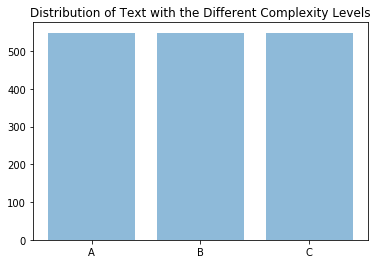

In [83]:
df_count= df['newLevel'].value_counts()
print(df_count[2])

plt.bar(df_count.index.values, df_count, align='center', alpha=0.5)
plt.title("Distribution of Text with the Different Complexity Levels")
 
plt.show()

In [119]:
print([columnName for columnName in df.columns if columnName.startswith("SE")])
features = normalizedDF._get_numeric_data().columns
print(features)

['SE_ratioRealSpellingErrors', 'SE_ratioSpellingErrors', 'SE_ratioSpellingErrorsWithCorrection', 'SE_ratioSpellingErrorsWithoutCorrection', 'SE_ratioUmlautSpellingErrors', 'SE_ratioCapitalisationErrors']
Index(['SE_ratioRealSpellingErrors', 'SE_ratioSpellingErrors',
       'SE_ratioSpellingErrorsWithCorrection',
       'SE_ratioSpellingErrorsWithoutCorrection',
       'SE_ratioUmlautSpellingErrors', 'SE_ratioCapitalisationErrors',
       'BF-average_sentence_length', 'BF-average_syllable_word',
       'BF-Flesch_Reading_Ease_Score', 'BF-Flesch_Kincaid_readability',
       ...
       'SC-no_passives_per_sentence', 'SC-no_passives_per_clause',
       'SC-zu_infinitive_per_clause', 'SC-zu_infinitive_per_sentence',
       'SC-separated_verb_per_clause', 'SC-separated_verb_per_sentence',
       'SC-av_inter_clause_per_clause', 'SC-av_inter_clause_per_sentence',
       'SC-relative_clauses_to_dependent_clauses_ratio',
       'SC-sein_haben_ratio'],
      dtype='object', length=210)


In [85]:
#df_count= df['cleanedSource'].value_counts()
#print(df_count[2])
#
#plt.bar(df_count.index.values, df_count, align='center', alpha=0.5)
#plt.title("Distribution of Text with the Different Complexity Levels")
# 
#plt.show()

No handles with labels found to put in legend.


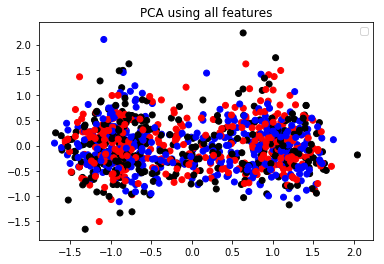

No handles with labels found to put in legend.


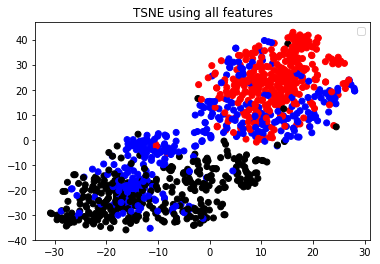

In [86]:
# PCS and TSNE 

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

df_sample = df.sample(1000)

X = dfPCA[features]
y = dfPCA["newLevel"].tolist()

color_map = {"A": (0, 0, 0), "B": (0, 0, 1), "C": (1, 0, 0)}
colors = [color_map[y] for y in y]

tsne = TSNE(n_components=2)
tsneDF = tsne.fit_transform(X)
plt.scatter([data[0] for data in pcaDF], [data[1] for data in pcaDF], c = colors)
plt.title("PCA using all features")
plt.legend(loc='upper right')
plt.show()


pca = PCA(n_components=2)
pcaDF = pca.fit_transform(X)
plt.scatter([data[0] for data in tsneDF], [data[1] for data in tsneDF], c = colors)
plt.title("TSNE using all features")
plt.legend(loc='upper right')
plt.show()

No handles with labels found to put in legend.


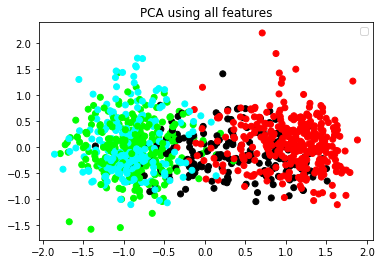

No handles with labels found to put in legend.


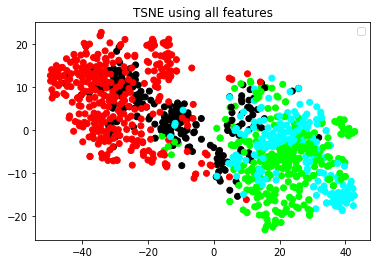

In [87]:
Adf = df_sample.loc[df['newLevel'] == "A"]
Bdf = df_sample.loc[df['newLevel'] == "B"]
Cdf = df_sample.loc[df['newLevel'] == "C"]

frames = [Bdf, Adf, Cdf]
X = pd.concat(frames)[features]
y = zip(Bdf["Source"].tolist() + Adf["Source"].tolist() + Cdf["Source"].tolist(), Bdf["Level"].tolist() +Adf["Level"].tolist()+Cdf["Level"].tolist())

def color_map(source, level):
    if source == "CLEG":
        return (0, 1, 0) #green
    if level == "B (CLEG A)":
        return (0, 1, 0) #green
    elif level == "B (CLEG B)":
        return (0, 0, 1) # blau
    else:
        if level.startswith("A"):
            return (1, 0, 0) # red
        elif level.startswith("C"):
            return (0, 1, 1) #türkis
        elif level.startswith("B"):
            return (0, 0, 0) #black
        else:
            print(level)
    
colors = [color_map(source, level) for source, level in y]


pca = PCA(n_components=2)
pcaDF = pca.fit_transform(X)
plt.scatter([data[0] for data in pcaDF], [data[1] for data in pcaDF], c = colors)
plt.title("PCA using all features")
plt.legend(loc='upper right')
plt.show()

tsne = TSNE(n_components=2)
tsneDF = tsne.fit_transform(X)
plt.scatter([data[0] for data in tsneDF], [data[1] for data in tsneDF], c = colors)
plt.title("TSNE using all features")
plt.legend(loc='upper right')
plt.show()

In [ ]:
import math
import numpy as np

for feature in features: 
    Bdf = df.loc[df['newLevel'] == "B"]
    Cdf = df.loc[df['newLevel'] == "C"]
    bCLEG = Bdf.loc[df['Source'] == "CLEG"][feature]
    bNoCLEG = Bdf.loc[df['Source'] != "CLEG"][feature]
    cCLEG = Cdf.loc[df['Source'] == "CLEG"][feature]
    cNoCLEG = Cdf.loc[df['Source'] != "CLEG"][feature]


    bins = np.linspace(df[feature].min(), df[feature].max(), 50)

    plt.hist(bCLEG, bins, alpha=0.5, label='Level B CLEG')
    plt.hist(bNoCLEG, bins, alpha=0.5, label='Level B noCLEG')
    plt.hist(cCLEG, bins, alpha=0.5, label='Level C CLEG')
    plt.hist(cNoCLEG, bins, alpha=0.5, label='Level C noCLEG')
    plt.title(feature)
    
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
#prefix = "BF" # SE, BF, LD, LV, MO, SC, SD, RF

#features=np.array([columnName for columnName in df._get_numeric_data() if columnName.startswith(prefix)])
#print(features)

BF-average_sentence_length


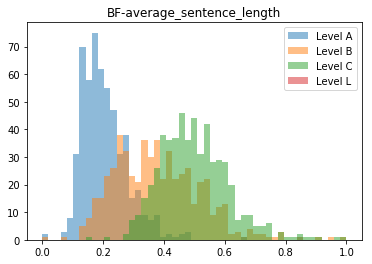

BF-average_syllable_word


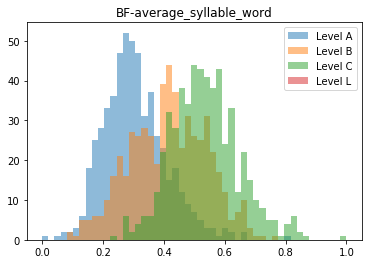

BF-Flesch_Reading_Ease_Score


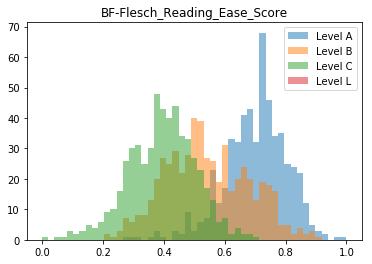

BF-Flesch_Kincaid_readability


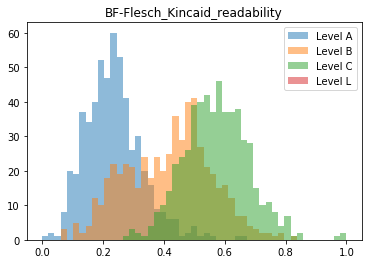

BF-percentag_hard_words


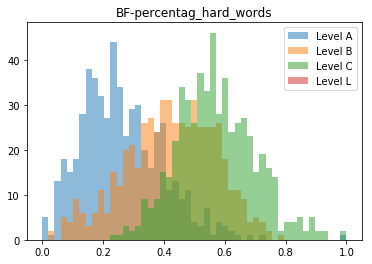

BF-fog


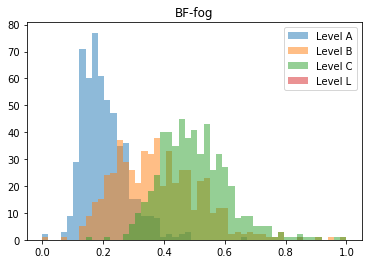

BF-polysyllable_count


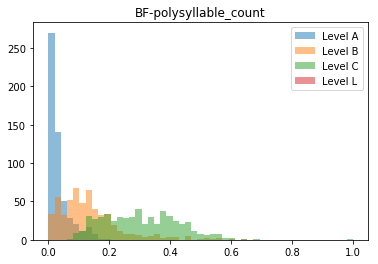

BF-smog


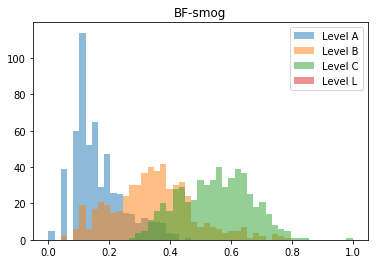

BF-average_character_per_word


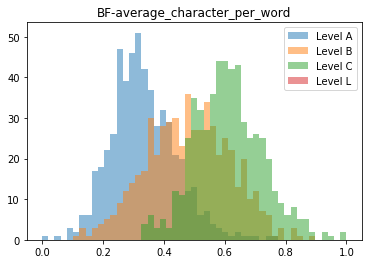

BF-text_length


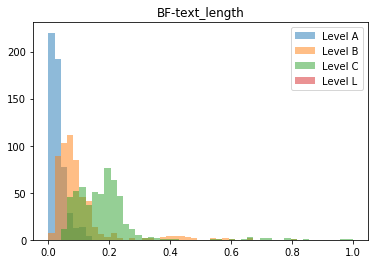

In [12]:
df = normalizedDF

for feature in features: 
    print(feature)
    a = df.loc[df['newLevel'] == "A"][feature]
    b = df.loc[df['newLevel'] == "B"][feature]
    c = df.loc[df['newLevel'] == "C"][feature]
    l = df.loc[df['newLevel'] == "L"][feature]

    bins = np.linspace(df[feature].min(), df[feature].max(), 50)

    plt.hist(a, bins, alpha=0.5, label='Level A')
    plt.hist(b, bins, alpha=0.5, label='Level B')
    plt.hist(c, bins, alpha=0.5, label='Level C')
    plt.hist(l, bins, alpha=0.5, label='Level L')
    plt.title(feature)
    
    plt.legend(loc='upper right')
    plt.show()

In [51]:
#import math
#import numpy as np

#features=[columnName for columnName in df.columns if columnName.startswith("BF")]

#for feature in features: 
#    Bdf = df.loc[df['newLevel'] == "B"]
#    Cdf = df.loc[df['newLevel'] == "C"]
#    bCLEG = Bdf.loc[df['Source'] == "CLEG"][feature]
#    bNoCLEG = Bdf.loc[df['Source'] != "CLEG"][feature]
#    cCLEG = Cdf.loc[df['Source'] == "CLEG"][feature]
#    cNoCLEG = Cdf.loc[df['Source'] != "CLEG"][feature]
#
#
#    bins = np.linspace(df[feature].min(), df[feature].max(), 50)
#
#    plt.hist(bCLEG, bins, alpha=0.5, label='Level B CLEG')
#    plt.hist(bNoCLEG, bins, alpha=0.5, label='Level B noCLEG')
#    plt.hist(cCLEG, bins, alpha=0.5, label='Level C CLEG')
#    plt.hist(cNoCLEG, bins, alpha=0.5, label='Level C noCLEG')
#    plt.title(feature)
#    
#    plt.legend(loc='upper right')
#    plt.show()

In [113]:
#import pandas.rpy2.common as com
import seaborn as sns
%matplotlib inline

def draw_correlation_matrix(df, features):
    # calculate the correlation matrix
    corr = df[features].corr()

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # plot the heatmap
    sns.heatmap(corr, 
            vmin=-1, vmax=1, mask=mask,
            cmap=plt.get_cmap("RdBu"),
            xticklabels=corr.columns,
            yticklabels=corr.columns)

In [69]:
print(corr)

                                  LD-uber_index  LV-squared_verb_variation  \
LD-uber_index                          1.000000                   0.864973   
LV-squared_verb_variation              0.864973                   1.000000   
LV-corrected_verb_variation            0.905449                   0.966847   
MO-Def                                 0.574027                   0.496185   
MO-Pers                               -0.604670                  -0.499593   
SD-avg_no_words_head_dep               0.704789                   0.624632   
SC-max_clause_length                   0.722355                   0.647989   
SC-av_num_dep_clauses_per_clause       0.622216                   0.502166   
SC-av_num_vps_per_clause               0.662853                   0.610599   
SC-av_non_terminals_per_sentence       0.643685                   0.549197   

                                  LV-corrected_verb_variation    MO-Def  \
LD-uber_index                                        0.905449  0.5

In [133]:
feature_Names = ['MO-1' 'MO-Def' 'MO-Pers' 'MO-Sent' 'MO-compounds2nouns']
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:

def drawSpiderweb(df, features, featureNames):
    N = len(features)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], featureNames, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.5,1], ["0.5", "1"], color="grey", size=7)
    plt.ylim(0,1)
 

    # Ind1
    values=df.groupby(["newLevel"]).mean()[features].loc["A"].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Level A")
    ax.fill(angles, values, 'b', alpha=0.1)
 
    # Ind2
    values=df.groupby(["newLevel"]).mean()[features].loc["B"].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Level B")
    ax.fill(angles, values, 'r', alpha=0.1)

    values=df.groupby(["newLevel"]).mean()[features].loc["C"].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Level C")
    ax.fill(angles, values, 'r', alpha=0.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.title("Top 10 Features")
    plt.show()

def plot_coefficients(classifier, feature_names, top_features=20):
    #function that plots the important coefficient for each class in a classifier
    #
    #param classifier:     classifier used
    #param feature_names:  list of feature names
    #param top_features:   numer of features on the graph
    #
    #return:               one graph for each class
    
    for stars, coef in zip(["A", "B", "C"], [coefs.ravel() for coefs in classifier.coef_]):
        top_positive_coefficients = np.argsort(coef)[-top_features:]
        top_negative_coefficients = np.argsort(coef)[:top_features]
        top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
        plt.figure(figsize=(15, 1))
        colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
        plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
        plt.title("Top features for categorizing Level " + stars + " Text")
        feature_names = np.array(feature_names)
        plt.xticks(np.arange(0, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha="right")
        plt.show()


In [134]:
len(features)

210

/home/soeren/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [  4   5  38  39 103 167 168 208] are constant.
  UserWarning)
/home/soeren/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


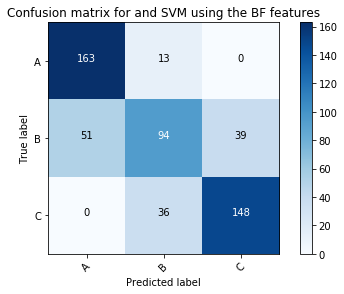

Index(['BF-average_sentence_length', 'BF-Flesch_Reading_Ease_Score',
       'BF-Flesch_Kincaid_readability', 'BF-fog', 'BF-polysyllable_count',
       'BF-smog', 'BF-average_character_per_word', 'LD-uber_index',
       'LV-corrected_verb_variation', 'SD-avg_no_words_head_dep'],
      dtype='object')
0.7444852941176471


/home/soeren/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: 'newLevel' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
/home/soeren/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: 'newLevel' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
/home/soeren/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning: 'newLevel' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version


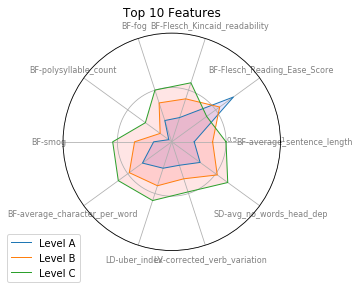

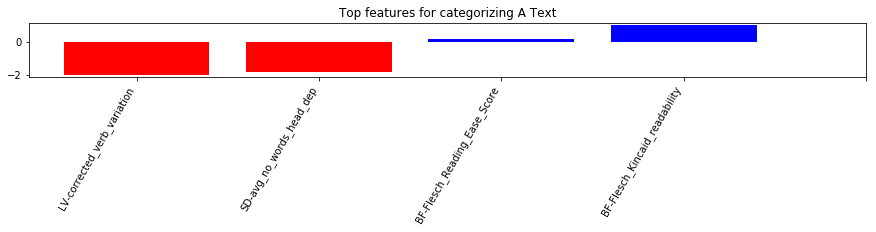

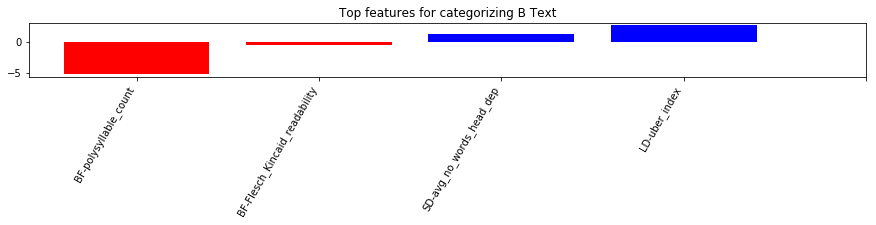

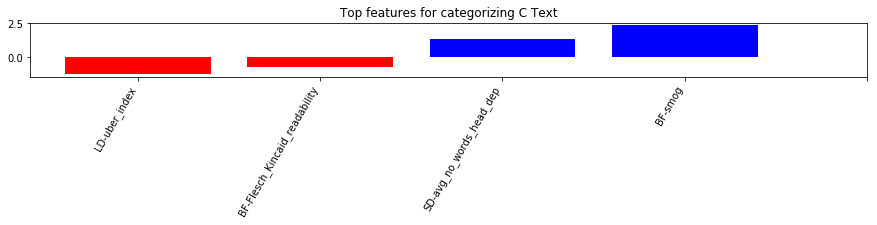

In [132]:
trainDF, testDF = train_test_split(df, test_size=0.33)

X_train = trainDF[features]
y_train = trainDF["newLevel"]

X_test = testDF[features]
y_test = testDF["newLevel"]


model = SelectKBest(f_classif, k=10).fit(X_train, y_train)
X_train = model.transform(X_train)
X_test = model.transform(X_test)


class_names = ["A", "B", "C"]

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title=str('Confusion matrix for and SVM using the ' + prefix + ' features'))

plt.show()

features_selected = features[model.get_support()]
print(features_selected)
print(clf.score(X_test, y_test))
drawSpiderweb(df, features_selected, features_selected)
plot_coefficients(clf, features_selected , top_features=2)

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

print("=== CrossValidation without feature selection ===")
clf = LinearSVC()
scores = cross_val_score(clf, df[features], df["newLevel"], cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

for k in [1, 5, 10, 20, 30, 40 , 50, 100]:
    print("=== CrossValidation with feature selection "+ str(k) + "===")
    clf = LinearSVC()
    kBest = SelectKBest(chi2, k=k)
    pipeline = Pipeline([('kBest', kBest), ('clf', clf)])
    scores = cross_val_score(pipeline, df[features], df["newLevel"], cv=10)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

=== CrossValidation without feature selection ===
Accuracy: 0.82 (+/- 0.04)
=== CrossValidation with feature selection 1===
Accuracy: 0.60 (+/- 0.05)
=== CrossValidation with feature selection 5===
Accuracy: 0.69 (+/- 0.06)
=== CrossValidation with feature selection 10===
Accuracy: 0.73 (+/- 0.08)
=== CrossValidation with feature selection 20===
Accuracy: 0.75 (+/- 0.07)
=== CrossValidation with feature selection 30===
Accuracy: 0.76 (+/- 0.08)
=== CrossValidation with feature selection 40===
Accuracy: 0.78 (+/- 0.06)
=== CrossValidation with feature selection 50===
Accuracy: 0.79 (+/- 0.06)
=== CrossValidation with feature selection 100===
Accuracy: 0.80 (+/- 0.05)


Optimal number of features : 50


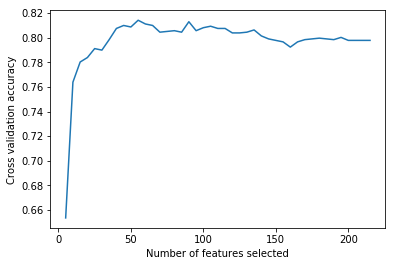

In [110]:
# RFE
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

X = df[features]
y = df["newLevel"]

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=5, cv=StratifiedKFold(2),
              scoring='accuracy')

rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation accuracy")
plt.plot(range(5, (len(rfecv.grid_scores_) + 1)*5, 5), rfecv.grid_scores_)
plt.show()

In [ ]:
top50features = features[rfecv.get_support()]

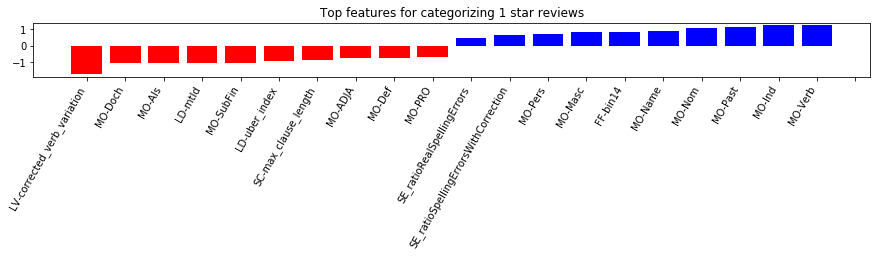

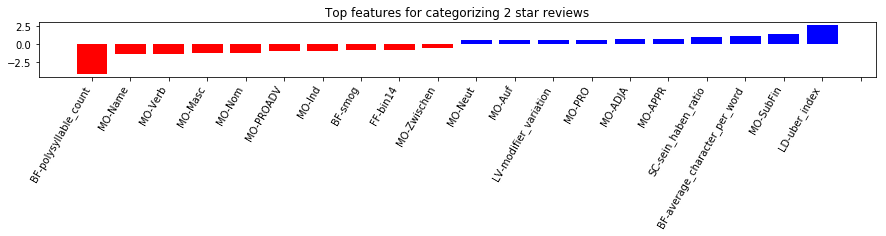

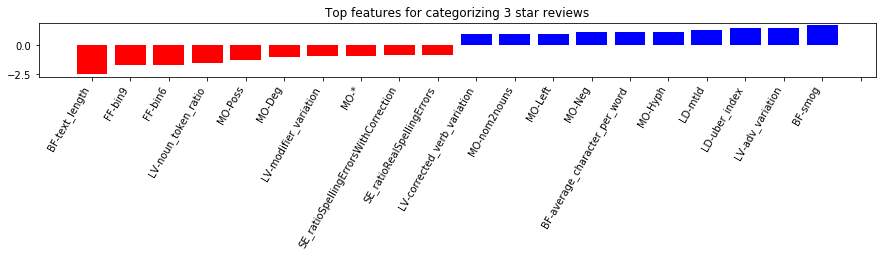

In [118]:
X = df[top50features]
y = df["newLevel"]

clf = LinearSVC()
clf.fit(X, y)

plot_coefficients(clf, top50features , top_features=10)

array([ 1,  1,  1, 12, 17, 18,  1, 13,  9,  1, 10,  1,  1,  1,  1,  1,  1,
        8,  8,  1,  1,  1,  3,  5,  1,  1,  1,  1,  1,  6,  1,  1, 12,  1,
       16,  9, 17,  1, 17, 17,  8,  1,  1,  1,  7,  1,  1,  1,  1,  1,  4,
        1,  1,  1,  1, 13,  9,  1,  1,  1, 15,  1,  1,  1,  1,  1,  6, 15,
        1,  1, 15,  1,  3,  1, 14,  1,  1, 16,  2, 10,  1,  2, 10,  1, 16,
        7,  1,  1,  1,  1,  1,  1, 11,  1,  1, 16,  1,  1,  8,  1,  1, 17,
        5, 18,  1,  1,  1,  6,  1, 10,  1,  1,  1,  1,  1,  1,  2,  1,  1,
       11,  1,  1,  1,  1, 14,  1,  1,  3,  1,  9,  1,  1, 12,  1,  1,  1,
        2,  1,  1,  1,  1,  7, 10,  1, 14,  4,  4,  2,  1,  1,  1,  1,  6,
        1,  1,  1,  1, 12,  1,  1,  1,  4,  8, 13,  1, 13,  1, 18, 18,  5,
        1,  1,  1,  1,  1,  1, 11,  1,  4,  1,  3, 13,  7,  7,  1,  1,  1,
        1, 15, 11, 14,  5, 11,  1,  9, 12,  1,  6, 15,  1, 14,  5,  1,  1,
        3,  1, 16,  1, 18,  1])

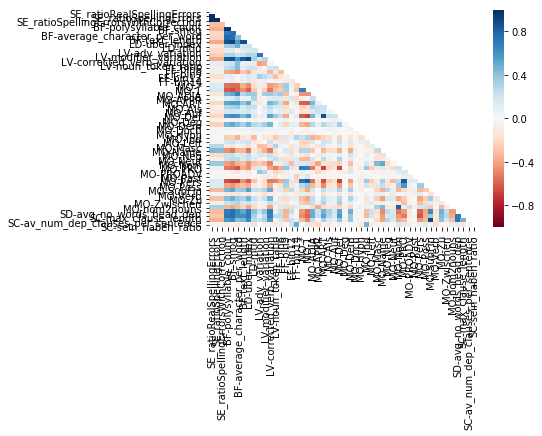

In [116]:
draw_correlation_matrix(df, top50features)

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 fe

Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Optimal number of features : 48


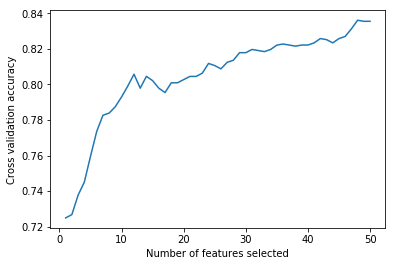

In [127]:
X = df[top50features]
y = df["newLevel"]

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')

rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation accuracy")
plt.plot(range(1, (len(rfecv.grid_scores_) + 1), 1), rfecv.grid_scores_)
plt.show()

In [140]:
from sklearn.feature_selection import RFE
X = df[top50features]
y = df["newLevel"]

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfe = RFE(svc, 1, step=1)

rfe.fit(X, y)
print(top50features[rfe.support_])
print([x for _,x in sorted(zip(rfe.ranking_, top50features))])

Index(['BF-smog'], dtype='object')
['BF-smog', 'SD-avg_no_words_head_dep', 'MO-Pers', 'SE_ratioSpellingErrorsWithCorrection', 'LD-mtld', 'LV-adv_variation', 'MO-Def', 'LV-corrected_verb_variation', 'MO-Verb', 'MO-Masc', 'BF-text_length', 'FF-bin9', 'FF-bin6', 'MO-Als', 'MO-1', 'LD-uber_index', 'MO-Left', 'SE_ratioSpellingErrors', 'BF-average_character_per_word', 'LV-noun_token_ratio', 'MO-Past', 'MO-Deg', 'MO-nom2nouns', 'MO-SubFin', 'FF-bin12', 'MO-Ind', 'MO-Poss', 'MO-Neg', 'LV-modifier_variation', 'SC-max_clause_length', 'MO-Auf', 'MO-Dem', 'MO-ART', 'MO-Nom', 'SE_ratioRealSpellingErrors', 'SC-av_num_dep_clauses_per_sentence', 'MO-Hyph', 'MO-Doch', 'MO-*', 'MO-PROADV', 'BF-polysyllable_count', 'MO-ADJA', 'MO-PRO', 'MO-APPR', 'MO-Zwischen', 'SC-sein_haben_ratio', 'MO-Zu', 'MO-Name', 'MO-Neut', 'FF-bin14']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4